In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv(r'C:\Users\amrmoslim928\machine-learning-course\Chapter_4_supervised_learning\3_support-vector-machine\weatherAUS.csv')
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
18984,2012-09-29,NorahHead,18.0,25.2,0.6,NaN,NaN,N,57.0,NW,...,27.0,1006.1,1006.4,NaN,NaN,21.8,23.7,No,0.0,No
26744,2009-07-18,Richmond,1.2,18.6,0.0,NaN,NaN,NW,20.0,NaN,...,46.0,1022.7,1018.1,NaN,NaN,6.8,18.3,No,0.2,No
118011,2009-05-01,Perth,11.3,25.0,0.0,4.6,9.8,ESE,28.0,E,...,32.0,1028.4,1024.7,0.0,0.0,15.2,24.6,No,0.0,No
134875,2014-08-06,AliceSprings,7.1,21.8,0.0,5.8,9.1,ESE,46.0,SSE,...,37.0,1029.0,1024.2,6.0,4.0,12.2,21.2,No,0.0,No
78910,2009-08-11,Dartmoor,8.3,16.4,2.6,0.6,9.1,E,44.0,E,...,70.0,1008.8,1008.6,NaN,NaN,9.4,15.0,Yes,1.2,Yes
89199,2012-09-21,GoldCoast,14.8,24.7,0.0,NaN,NaN,NW,37.0,N,...,60.0,1018.5,1013.1,NaN,NaN,21.3,22.9,No,0.6,No
65910,2008-12-13,Melbourne,15.7,17.1,36.2,4.8,0.0,SW,76.0,NW,...,93.0,988.9,993.6,8.0,8.0,16.6,15.4,Yes,21.8,Yes
51950,2012-07-24,MountGinini,-1.3,8.3,0.0,NaN,NaN,NNW,33.0,ENE,...,59.0,NaN,NaN,NaN,NaN,5.5,5.9,No,0.2,No
103848,2011-06-27,Woomera,6.1,20.0,0.0,4.0,9.5,ESE,35.0,SE,...,39.0,1028.6,1026.1,0.0,0.0,10.1,19.5,No,0.0,No
37613,2014-02-07,WaggaWagga,15.1,36.6,0.0,10.0,12.8,E,28.0,E,...,12.0,1014.7,1011.3,1.0,1.0,24.6,34.7,No,0.0,No


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [15]:
# data exploration 
# check class distributions
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Pie(labels=['NO Rain','Rain'],
           values=df['RainToday'].value_counts())
])
fig.update_layout(title_text='RainToday distributions')
fig.show()

In [16]:
# newdf = df.drop(['RainToday','RainTomorrow'], axis=1)

# newdf.info()

In [17]:
df = df.drop(columns=['Location','Date'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null obj

In [18]:
# df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
# df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
# df.info()
df = df.dropna(how='any')
df.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
64052,8.7,15.2,0.6,3.8,5.2,WSW,61.0,W,WSW,31.0,...,63.0,1016.9,1017.5,7.0,7.0,12.1,13.8,No,0.4,No
86931,20.8,33.6,0.2,8.2,11.8,E,37.0,SSE,E,17.0,...,19.0,1015.5,1012.6,3.0,5.0,27.7,32.6,No,0.0,No
38020,11.3,27.6,0.0,10.6,11.2,ENE,57.0,SE,NE,17.0,...,26.0,1022.8,1020.9,0.0,0.0,16.7,26.4,No,0.0,No
73635,10.1,13.1,0.0,2.8,0.0,N,52.0,N,N,24.0,...,77.0,1015.1,1010.2,8.0,8.0,11.9,11.9,No,21.6,Yes
37613,15.1,36.6,0.0,10.0,12.8,E,28.0,E,ENE,19.0,...,12.0,1014.7,1011.3,1.0,1.0,24.6,34.7,No,0.0,No
75285,14.4,18.4,1.2,4.2,4.3,SE,52.0,SSE,SSE,15.0,...,60.0,1022.7,1022.9,8.0,8.0,15.3,17.3,Yes,0.0,No
126939,12.4,16.1,0.0,3.0,1.9,S,28.0,E,ESE,9.0,...,72.0,1017.1,1016.4,7.0,6.0,12.8,15.3,No,0.0,No
119329,18.1,33.5,0.0,9.2,11.7,SSW,39.0,E,SSW,13.0,...,43.0,1016.4,1012.5,0.0,0.0,22.8,30.8,No,0.0,No
32486,9.6,14.0,0.0,8.0,9.8,W,72.0,WNW,WSW,37.0,...,26.0,1017.3,1019.8,3.0,7.0,10.5,13.3,No,0.0,No
13299,20.2,22.2,59.6,9.4,2.2,NNE,46.0,NE,W,15.0,...,92.0,1006.4,1006.4,8.0,8.0,20.3,20.9,Yes,11.4,Yes


In [19]:
model_df = df.drop(columns=['RainToday','RainTomorrow','RISK_MM'],axis = 1)
model_df.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
93151,9.0,25.5,0.0,7.2,9.9,S,39.0,SSW,NE,2.0,19.0,60.0,32.0,1019.2,1015.2,0.0,1.0,18.7,24.2
116221,1.5,17.9,0.0,2.4,9.2,E,39.0,S,E,13.0,24.0,83.0,44.0,1034.5,1031.2,1.0,1.0,8.5,17.2
77327,9.1,13.3,0.0,0.6,0.8,SSW,24.0,S,SSW,13.0,13.0,66.0,68.0,1032.6,1030.6,7.0,7.0,10.8,12.2
76827,8.9,21.2,8.2,7.4,4.6,SSW,39.0,WNW,SSW,7.0,17.0,99.0,66.0,1020.5,1019.5,8.0,7.0,11.3,19.0
135058,15.4,33.9,0.0,13.6,12.8,ESE,35.0,E,E,15.0,13.0,24.0,19.0,1012.7,1009.6,0.0,1.0,26.7,32.2
34241,20.8,42.5,0.0,9.8,8.7,NW,56.0,NW,NW,13.0,35.0,48.0,12.0,1005.8,998.8,6.0,6.0,27.7,40.6
98160,8.7,18.6,0.4,1.6,6.7,W,48.0,NNW,WSW,17.0,28.0,96.0,87.0,1022.0,1020.8,7.0,8.0,12.6,15.0
83967,21.8,28.1,0.0,8.8,3.8,ESE,20.0,ESE,SSW,6.0,4.0,69.0,80.0,1015.9,1015.2,7.0,7.0,26.8,23.7
136725,24.1,34.3,0.0,5.0,11.0,NNE,43.0,NE,NE,24.0,26.0,73.0,43.0,1012.7,1008.7,5.0,3.0,28.1,32.9
36287,14.2,29.8,0.0,4.0,10.9,NE,26.0,E,NNW,9.0,9.0,69.0,34.0,1021.7,1017.9,1.0,1.0,18.4,28.6


In [20]:
model_df=pd.get_dummies(model_df.iloc[:,:])
model_df.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
117251,16.5,23.2,11.2,2.2,5.3,50.0,24.0,28.0,75.0,52.0,...,0,0,0,1,0,0,0,0,0,0
83986,22.1,36.7,0.0,3.4,12.6,28.0,4.0,9.0,67.0,59.0,...,0,0,0,0,0,0,0,0,0,0
37331,8.2,21.3,0.0,2.4,7.1,48.0,9.0,37.0,91.0,37.0,...,0,0,0,0,0,1,0,0,0,0
35316,16.3,25.1,0.4,5.6,11.8,37.0,24.0,20.0,74.0,48.0,...,0,0,0,1,0,0,0,0,0,0
99242,5.0,17.6,0.2,0.8,6.7,31.0,20.0,13.0,79.0,67.0,...,0,0,0,0,0,0,0,0,0,0
135430,19.8,39.7,0.0,15.2,12.8,35.0,7.0,28.0,20.0,6.0,...,0,0,0,0,0,0,0,0,0,0
60452,9.5,19.0,1.0,4.0,8.1,56.0,11.0,30.0,67.0,51.0,...,0,0,0,0,0,0,0,0,0,1
67654,7.8,15.4,0.4,1.6,4.0,31.0,13.0,15.0,56.0,45.0,...,0,0,1,0,0,0,0,0,0,0
61059,3.8,17.3,0.2,2.8,6.7,24.0,11.0,9.0,77.0,47.0,...,0,0,0,0,0,0,0,0,0,1
66574,10.2,17.4,0.0,4.0,6.0,35.0,20.0,20.0,73.0,59.0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=60)
model.fit(model_df, df['RainTomorrow'])
fig = go.Figure(data=[
    go.Bar(x=list(model_df.columns), 
           y=model.feature_importances_)])
fig.update_layout(title_text='feature importance')
fig.show()

In [22]:
# select most important features
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(model, prefit=True,threshold=5e-2)
X_new = model.transform(model_df)
print("new features are : {} features ".format(X_new.shape[1]))   

new features are : 7 features 


In [23]:
# now lets train a logistic regression on new features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new,df['RainTomorrow'],test_size=0.2)
# xtrain,xtest,ytrain,ytest=train_test_split(model_df.iloc[:,:],df['RainTomorrow'],test_size=0.3)
log_reg=LogisticRegression(solver='lbfgs',max_iter = 2000).fit(xtrain,ytrain)

In [24]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = log_reg.predict(xtest)
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(ytest,predictions),
                                                                 accuracy_score(ytest, predictions)))

Classification Report :
               precision    recall  f1-score   support

          No       0.87      0.95      0.91      8762
         Yes       0.74      0.52      0.61      2522

    accuracy                           0.85     11284
   macro avg       0.80      0.73      0.76     11284
weighted avg       0.84      0.85      0.84     11284
 
 Model Acurracy = 0.8513824884792627


In [30]:
confusion_matrix(ytest, predictions)

array([[7376, 1408],
       [2115,  385]], dtype=int64)

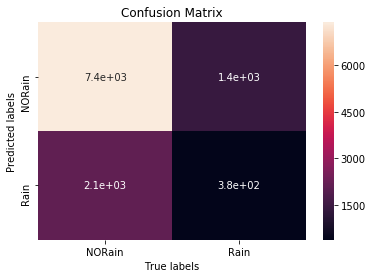

In [28]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = pd.DataFrame(confusion_matrix(ytest, predictions), range(2),range(2))

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_title('Confusion Matrix')
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels')
ax.xaxis.set_ticklabels(['NORain', 'Rain']); ax.yaxis.set_ticklabels(['NORain', 'Rain']);

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X_new,df['RainTomorrow'],test_size=0.2)
weather_svc = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
weather_svc.fit(xtrain,ytrain)
pred = weather_svc.predict(xtest)
score = accuracy_score(ytest,pred)
print('Accuracy :',score)

Accuracy : 0.8510280042538108


In [33]:
confusion_matrix(ytest, pred)

array([[7460, 1293],
       [2163,  368]], dtype=int64)

In [31]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X_new,df['RainTomorrow'],test_size=0.2)
DT_dt = DecisionTreeClassifier(random_state=0)
DT_dt.fit(xtrain,ytrain)
y_pred = DT_dt.predict(xtest)
score = accuracy_score(ytest,y_pred)
print('Accuracy :',score)

Accuracy : 0.7863346331088267


In [32]:
confusion_matrix(ytest, y_pred)

array([[7472, 1281],
       [1130, 1401]], dtype=int64)